## 任务1 计算 平均缴费金额、平均缴费次数，并以 csv 格式输出结果保存为                                           
   ## “居民客户的用电缴费习惯分析 1.csv”

### 1.1 导入相关python库

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd

### 1.2. 探索数据

数据来源于中国软件杯官网A5-电力客户行为分析 http://www.cnsoftbei.com/plus/view.php?aid=715                                   
测试数据或平台部分所提供的测试数据：cph.xlsx
将其改名为电力1.xlsx后放入jupyter进行分析

In [2]:
pd.set_option('display.unicode.east_asian_width',True)
df = pd.read_excel('电力1.xlsx')     # 读取excel文件
print(df.head()) #输出数据的前5行

     用户编号   缴费日期  缴费金额（元）
0  1000000001 2018-03-01             101
1  1000000001 2018-05-03              80
2  1000000001 2018-07-02             150
3  1000000001 2018-08-02             200
4  1000000001 2018-09-05             220


### 1.3 分析并将输出结果保存

In [4]:
totall=0
time=0
user=[]
for i in range(0,664):
    if i!=663 and df.iloc[i, 0]==df.iloc[i+1,0]:
        time+=1
        totall+=df.iloc[i,2]
    else:
        time+=1
        totall+=df.iloc[i,2]
        user1=[]
        user1.append(df.iloc[i, 0])
        user1.append(time)
        user1.append('{:.3f}'.format(totall/time))
        time=0
        totall=0
        user.append(user1)
names = ["user_id","平均缴费次数","平均缴费金额"]
test = pd.DataFrame(columns = names,data=user)
test.to_csv('居民客户的用电缴费习惯分析 1.csv',index=False,encoding='utf_8_sig')
print(test)

       user_id  平均缴费次数 平均缴费金额
0   1000000001             8      123.375
1   1000000002             7       70.000
2   1000000003             7      168.571
3   1000000004             8       77.625
4   1000000005             7      214.286
..         ...           ...          ...
95  1000000096             7      130.857
96  1000000097             6      108.167
97  1000000098             6      122.500
98  1000000099             6      142.167
99  1000000100             7      134.714

[100 rows x 3 columns]


### 1.4 对平均缴费次数","平均缴费金额"相关可视化

In [5]:
data = pd.read_csv('居民客户的用电缴费习惯分析 1.csv')     # 读取excel文件

#### '平均缴费次数'的箱线图和带有正态拟合的直方图

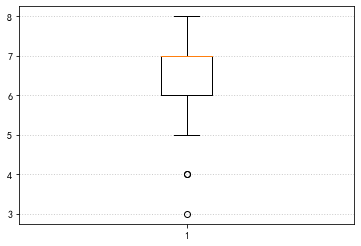

In [6]:
plt.rcParams['font.sans-serif']='Simhei'
plt.rcParams['axes.unicode_minus']=False
x=data['平均缴费次数']
plt.boxplot(x)
plt.grid(axis='y',ls=':',lw=1,color='gray',alpha=0.4)
plt.show()

E:\acon\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


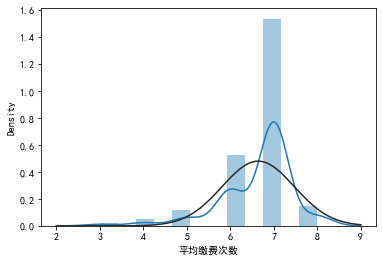

In [11]:
sns.distplot(data.平均缴费次数,kde=True, fit=stats.norm)
plt.show()

从以上图可见100个用户的平均缴费次数大体集中在6次和7次

#### '平均缴费金额'的箱线图和带有正态拟合的直方图

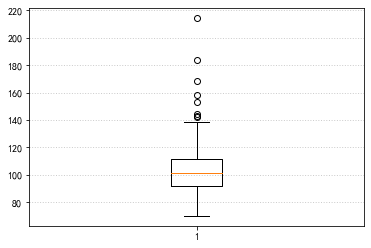

In [12]:
plt.rcParams['font.sans-serif']='Simhei'
plt.rcParams['axes.unicode_minus']=False
x=data['平均缴费金额']
plt.boxplot(x)
plt.grid(axis='y',ls=':',lw=1,color='gray',alpha=0.4)
plt.show()

E:\acon\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


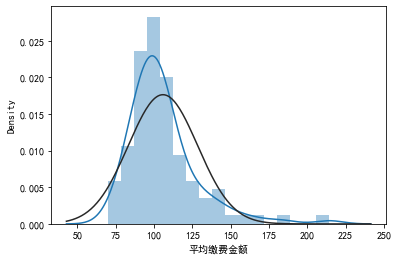

In [13]:
sns.distplot(data.平均缴费金额,kde=True, fit=stats.norm)
plt.show()

从以上图可见100个用户的平均缴费金额大体分布于70~150的区间上